# The role of bargaining power on household labour market behaviour

Many models of household labour market decisions assume that household members have equal power. This likely does not hold in reality. Our project investigates the effect of imbalances in power levels of household members on labour supply choices, using a dynamic unitary lifecycle model, which we solve and simulate numerically. 
 <br>
 
## Theoretical motivation 
This project is motivated by some topics we have come across in the course 'Household Behavior Over The Lifecycle'. The general framework for our model fits within life-cycle dynamic models of household behaviour, with a bellman equation as follows:


\begin{align*}
V_{t}\left(\mathcal{S}_{t}\right) & =\max _{\mathcal{C}_{t}}\left\{u\left(\mathcal{C}_{t}, \mathcal{S}_{t}\right)+\beta \mathbb{E}_{t}\left[V_{t+1}\left(\mathcal{S}_{t+1}\right)\right]\right\}  \tag{1}\\
\mathcal{S}_{t+1} & \sim \Gamma\left(\mathcal{S}_{t}, \mathcal{C}_{t}\right) \tag{2}
\end{align*}


where $\mathcal{S_t}$ is the set of state variables, $\mathcal{C_t}$ are the set of choice variables and $\beta$ is the discount rate. Examples are Deaton's model or the Buffer-Stock model. Models of this type are used to study (investment) decisions over individuals' life. They are solved using backwards induction (needs a terminal condition).

### How to model power?
To model power dynamics, household utility can be expressed as a weighted sum of household member's utility. Power of member 1 is denoted as $\mu$:

\begin{equation*}
U\left(\mathcal{C}_{t}, \mathcal{S}_{t}, \mu_{t}\right)=\max _{\mathcal{C}_{t}}\left\{\mu_{t} \cdot u_{1}\left(\mathcal{C}_{t}, \mathcal{S}_{t}\right)+\left(1-\mu_{t}\right) \cdot u_{2}\left(\mathcal{C}_{t}, \mathcal{S}_{t}\right)\right\} \tag{3}
\end{equation*}


**Unitary model:** Constant power, $\mu_{t}=\mu \forall t$. e.g. $\mu = 0.5$

**Collective model:** Power determined by exogenous factors, $\mu_{t}=\mu_{t}^{\star}\left(\mathcal{Z}_{t}\right)$.

**Full commitment:** Power determined by endogenous factors at initial period, $\mu_{t}=\mu_{t}^{\star}\left(\mathcal{S}_{0}\right)$

**No commitment:** Power determined by endogenous factors in all periods, $\mu_{t}=\mu_{t}^{\star}\left(\mathcal{S}_{t}\right)$

**Limited commitment:** Power determined by endogenous factors in some periods, $\mu_{t}=\mu_{t}^{\star}\left(\mathcal{S}_{t}, \mu_{t-1}\right)$.


## Our model: 

This project solves and simulates a $T$-period **unitary** lifecycle model with two-earner couples. For simplicity, couples cannot divorce nor save.

The **Bellman equation** and the recursive formulation of our simple model is 
$$
\begin{align*}
V_{t}(K_{1,t},K_{2,t}) & =\max_{h_{1,t},h_{2,t}}U(c_{t},h_{1,t},h_{2,t})+\beta V_{t+1}(K_{1,t+1},K_{2,t+1})\\
c_{t} & =\sum_{j=1}^{2}w_{j,t}h_{j,t}-T(w_{1,t}h_{1,t},w_{2,t}h_{2,t})\\
\log w_{j,t} & =\alpha_{j,0}+\alpha_{j,1}K_{j,t},\;j\in\{1,2\}\\
K_{j,t+1} & =(1-\delta)K_{j,t}+h_{j,t},\;j\in\{1,2\}
\end{align*}
$$

where couples choose how much to consume, $c_t$, and how much labour to supply, $h_{j,t}$. Human capital of each member, $K_{j,t}$, is accumulated from working, which also enters into the wage function, $w_{j,t}$. Each period, human capital depreciates at the rate $\delta$. 
 
**Preferences** are the **weighted** sum of individuals
$$ U(c_{t},h_{1,t},h_{2,t})=\mu(\frac{(c_{t}/2)^{1+\eta}}{1+\eta} -\rho_{1}\frac{h_{1,t}^{1+\gamma}}{1+\gamma})+ (1-\mu)(\frac{(c_{t}/2)^{1+\eta}}{1+\eta} -\rho_{2}\frac{h_{2,t}^{1+\gamma}}{1+\gamma})$$

**Taxes** are on the household level, to model a joint taxation system, such as those in the US and Germany:
$$
T(Y_{1},Y_{2})=(1-\lambda(Y_{1}+Y_{2})^{-\tau})\cdot(Y_{1}+Y_{2})
$$

**Terminal period:** There are no bequests such that
$$
V_{T}(K_{1,T},K_{2,T})  =\max_{h_{1,T},h_{2,T}}U(c_{T},h_{1,T},h_{2,T})
$$

# Analysis
For this analysis, we denote an equal power share $(\mu =0.5 \forall t)$ as the 'baseline' model, and $(\mu =0.3 \forall t)$ as the 'patriarchy' case. The interpretation is that the household members are a husband and wife, where member 1 is the wife and member 2 is the husband. We then investigate how simulated labour supply behaves in the 'baseline' case, compared to the 'patriarchy' case. 

### Setup

In [9]:
%load_ext autoreload
%autoreload 2

import numpy as np
import numba as nb

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
# load local model file and initialize model class
from DynHouseholdLaborModel import DynHouseholdLaborModelClass
model = DynHouseholdLaborModelClass()

par = model.par
sol = model.sol
sim = model.sim

In [11]:
model_patriarchy = DynHouseholdLaborModelClass(par={'mu':0.3}) 

## Solving and simulating the two models

In [12]:
# solving the models (using backwards induction)
model.solve()
model_patriarchy.solve()

In [13]:
# simulating the models
model.simulate()
model_patriarchy.simulate()

### Visualising Simulated Behaviour

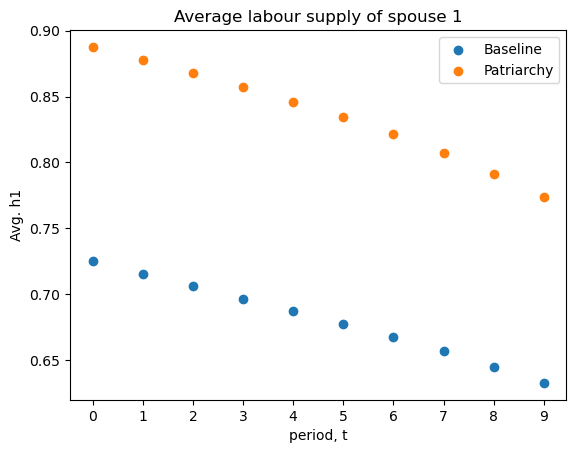

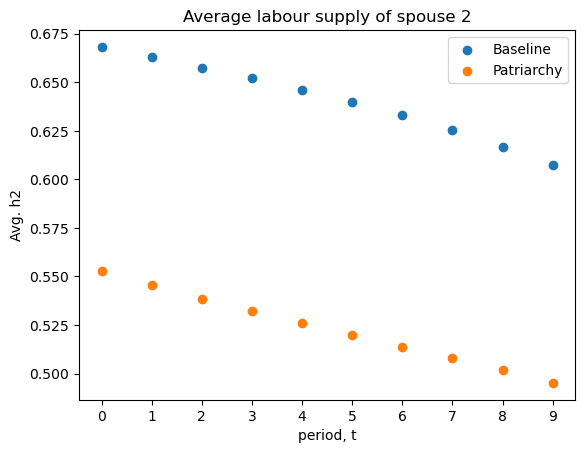

In [14]:
for var, title in [('h1', 'Average labour supply of spouse 1'), ('h2', 'Average labour supply of spouse 2')]:
    fig, ax = plt.subplots()
    ax.scatter(range(par.simT), np.mean(getattr(model.sim, var), axis=0), label='Baseline')
    ax.scatter(range(par.simT), np.mean(getattr(model_patriarchy.sim, var), axis=0), label='Patriarchy')
    ax.set(xlabel='period, t', ylabel=f'Avg. {var}', xticks=range(par.simT))
    ax.set_title(title)
    ax.legend()
    plt.show()

In the Baseline model, spouse 1's labor supply is higher compared to the Patriarchy model, while in the Patriarchy model, spouse 2's labor supply is higher than in the Baseline model. Over time, labor supply decreases. This behavior is expected as, towards the terminal period, earnings per hour increase due to human capital accumulation. Consequently, less work is needed to achieve the same income. The income effect outweighs the substitution effect.

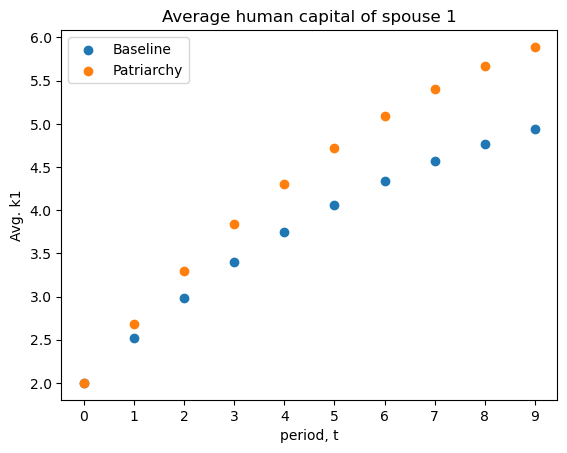

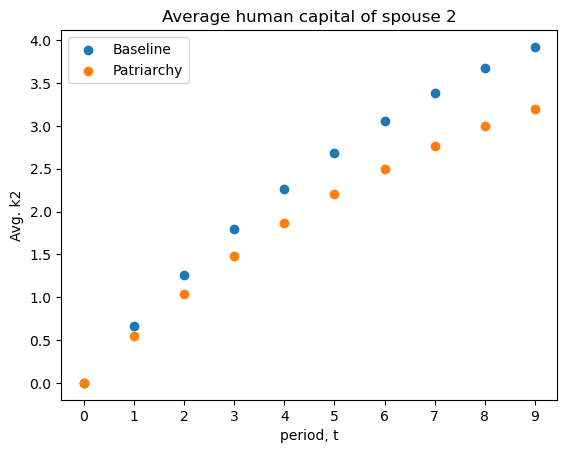

In [15]:
for var, title in [('k1', 'Average human capital of spouse 1'), ('k2', 'Average human capital of spouse 2')]:
    fig, ax = plt.subplots()
    ax.scatter(range(par.simT), np.mean(getattr(model.sim, var), axis=0), label='Baseline')
    ax.scatter(range(par.simT), np.mean(getattr(model_patriarchy.sim, var), axis=0), label='Patriarchy')
    ax.set(xlabel='period, t', ylabel=f'Avg. {var}', xticks=range(par.simT))
    ax.set_title(title)
    ax.legend()
    plt.show()

The human capital accumulation for spouse 1 is higher in the Baseline model compared to the Patriarchy model, while for spouse 2, it is higher in the Patriarchy model compared to the Baseline model. Over time, human capital increases, which aligns with the human capital function:
\begin{align*}
K_{j,t+1} & =(1-\delta)K_{j,t}+h_{j,t},\;j\in\{1,2\}
\end{align*}

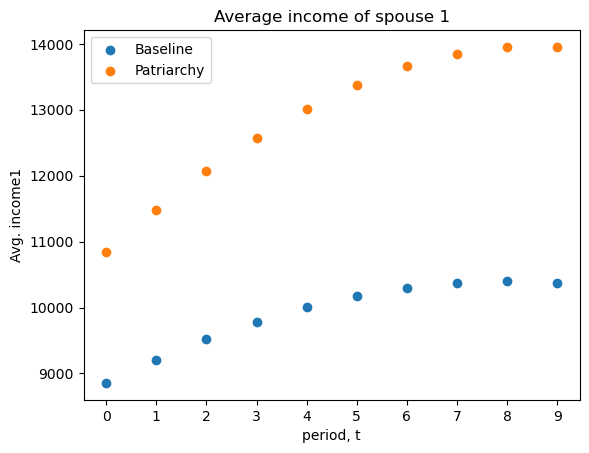

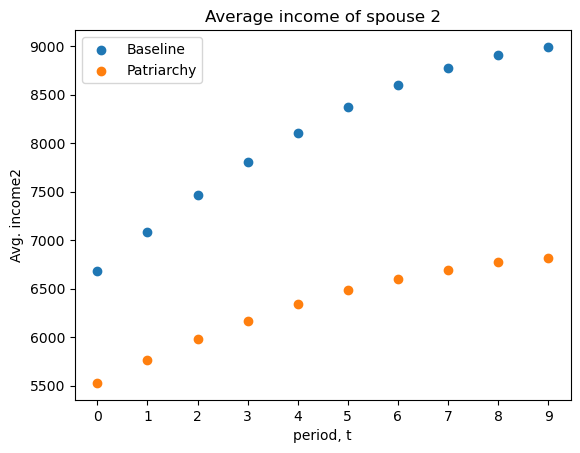

In [16]:
for var, title in [('income1', 'Average income of spouse 1'), ('income2', 'Average income of spouse 2')]:
    fig, ax = plt.subplots()
    ax.scatter(range(par.simT), np.mean(getattr(model.sim, var), axis=0), label='Baseline')
    ax.scatter(range(par.simT), np.mean(getattr(model_patriarchy.sim, var), axis=0), label='Patriarchy')
    ax.set(xlabel='period, t', ylabel=f'Avg. {var}', xticks=range(par.simT))
    ax.set_title(title)
    ax.legend()
    plt.show()

In the Baseline model, spouse 1's income is higher compared to the Patriarchy model, whereas spouse 2's income is higher in the Patriarchy model compared to the Baseline model. Income increases over time due to the growth in human capital, which, combined with the hours worked, determines income. This relationship is described by the function:
\begin{align*}
\log w_{j,t} & =\alpha_{j,0}+\alpha_{j,1}K_{j,t},\;j\in\{1,2\}
\end{align*}
Despite the reduction in hours worked, as seen in the previous graphs, the increase in human capital compensates, leading to a net increase in income.

# Conclusion

The figures above illustrate the simulated labor market behavior and present our results. As observed, in the 'patriarchy' model, female labor supply, human capital accumulation, and wage income are all higher compared to the 'baseline' model, whereas the opposite is true for men.

This behavior is expected because, in the 'patriarchy' model, relatively less weight is placed on the disutility of work for the female household member $\rho_{1}\frac{h_{1,t}^{1+\gamma}}{1+\gamma})$. Consequently, the female household member increases labor supply in all periods relative to the male. This finding is interesting as it partially explains why an increase in the female's bargaining power does not lead to the desired effect of that much higher labor supply for them. However, this model does not captures intra-household decisions and does not consider outside options like remaining single. Future research could address this issue by incorporating models such as the limited commitment model.